# Fake News Classifier

#### Build a system to identify unreliable news articles

#### "text" IDV is used for Predicting the label (Fake or Real)

#### Libraries Used for Text Classification :
* from sklearn.feature_extraction.text import IfidfVectorizer
* from nltk.corpus import stopwords
* from nltk.stem.porter import PorterStemmer

* MultinominalNB
* PassiveAggressiveClassifier



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv("Fake_News_dataset.csv")
df.shape

(20800, 5)

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

# Handle Null Values

* Dropping the NaN values
* After dropping reset index ,since dropping changes the index values

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df = df.reset_index()
df.head(10)

,level_0,index,id,title,author,text,label
0,0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


## Remove stop words and special chars

In [10]:
df['text'][8]

'Organizing for Action, the activist group that morphed from Barack Obama’s first presidential campaign, has partnered with the   Indivisible Project for “online trainings” on how to protest President Donald Trump’s agenda. [Last week, Breitbart News extensively reported that Indivisible leaders are openly associated with groups financed by billionaire George Soros.  Politico earlier this month profiled Indivisible in an article titled, “Inside the protest movement that has Republicans reeling. ”  The news agency not only left out the Soros links, but failed to note that the organizations cited in its article as helping to amplify Indivisible’s message are either financed directly by Soros or have close ties to groups funded by the billionaire, as Breitbart News documented. Organizing for Action (OFA) is a   community organizing project that sprung from Obama’s 2012 campaign organization, Organizing for America, becoming a nonprofit described by the Washington Post as “advocate[ing] fo

In [11]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer ,HashingVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# We can also apply Lemmetization but it takes more time

ps = PorterStemmer()
corpus = []

for i in range(0,len(df)):
    text = re.sub( '[^a-zA-Z]' ,' ' , df['text'][i]) #substitute chars other than a-zA-Z by space
    text = text.lower()
    text = text.split() #split text by ' ' n converts into list of words
    
    #removes stopwords and perform stemming for non-stop words
    text = [ ps.stem(w) for w in text if not w in stopwords.words('english') ]
    text =  ' '.join(text)
    corpus.append(text)
corpus


KeyboardInterrupt: 

## Applying CountVectorizer
### Creating the Bag of Words Model

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# max_features : fetch most 5000 frequently occuring words
# ngram_range : take combination of 1 word , 2 words n 3 words as feature n apply BoW
tfidf = TfidfVectorizer(max_features =5000 ,ngram_range=(1,3))

print(type(cv))
X = tfidf.fit_transform(corpus).toarray() # convert matrix to array 
print(type(X))

<class 'sklearn.feature_extraction.text.CountVectorizer'>
<class 'numpy.ndarray'>


In [102]:
# Now we could see 50000 features since we have taken top most 5000 frequent words
print ( X.shape )


(18285, 5000)


In [97]:
y = df['label']

In [107]:
'''It displays the params for the algorithm used (CountVectorizer)
'''
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [106]:
''''In tfidf for  ngram_range we have mentioned 1,3 which takes combination of 2 words n 3 words
Ex : abc , abc news
Ex : 'abus', 'abus new', 'abus new york' '''
tfidf.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

### Divide dataset to Train Test set

In [124]:
from sklearn.model_selection import train_test_split as tts

X_train ,X_test ,y_train ,y_test = tts (X ,y , test_size=0.33 ,random_state=10)

In [125]:
df1 = pd.DataFrame(X_train , columns = tfidf.get_feature_names())
df1.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
import matplotlib.pyplot as plt

In [122]:
def plot_confusion_matrix( cm ,classes , normalize=False ,
                          title='Confusion Matrix' ,
                         cmap = plt.cm.Blues):
    '''
    This Function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    '''
    
    plt.imshow(cm ,interpolation='nearest' , cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes ,rotation=45)
    plt.yticks(tick_marks ,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]
        print("Normalized confusion Matrix")
    else:
        print("Confusion Matrix ,without Normalization")
        
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text( j , i, cm[i,j] ,
                horizontalalignment = 'center' ,
                color='white' if cm[i,j] >thresh else 'black')
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

## MultinominalNB Algorithm

In [166]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix ,accuracy_score
import itertools

model = MultinomialNB()
model.fit(X_train ,y_train)
y_pred = model.predict(X_test)

In [167]:
score = round(accuracy_score(y_test,y_pred),2)*100
cm = confusion_matrix(y_test ,y_pred)

============== MultiNominalNB Accuracy : 90.0% ============
Confusion Matrix ,without Normalization


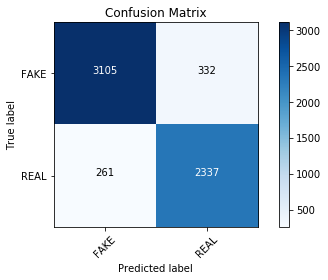

In [169]:
print("============== MultiNominalNB Accuracy : {}% ============".format(score) )
plot_confusion_matrix(cm , classes=['FAKE' ,'REAL'])

# Passive Agressive Classifier Algorithm

In [188]:
from sklearn.linear_model import PassiveAggressiveClassifier

model_pac = PassiveAggressiveClassifier()
model_pac.fit(X_train,y_train)
y_pred = model_pac.predict(X_test)

PassiveAggressiveClassifier Accuracy : 92% 
Confusion Matrix ,without Normalization


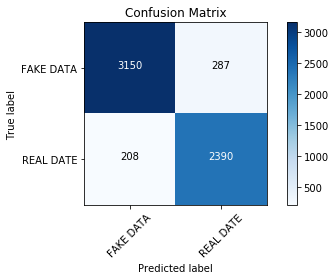

In [193]:
score = round((accuracy_score(y_test,y_pred)),2)*100
cm = confusion_matrix(y_test ,y_pred)

print("PassiveAggressiveClassifier Accuracy : %.0f%% " % score)
plot_confusion_matrix(cm , classes=['FAKE DATA' ,'REAL DATE'])

# MultinomialNB with HyperParameter Tuning

In [172]:
model_NB = MultinomialNB(alpha =0.1)

In [182]:
previous_score =0.91
for alpha in np.arange(0 ,1,0.1): #strat ,stop ,step
    sub_model = MultinomialNB(alpha = alpha)
    sub_model.fit(X_train ,y_train)
    y_pred = sub_model.predict(X_test)
    score = accuracy_score(y_test ,y_pred)
    if score > previous_score :
        model_NB = sub_model
        print("Alpha : {} ,Score : {}".format(alpha,score))
    

C:\Users\Rakshu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [206]:
'''
The most -ve value is the most FAKE word  -11
The less -ve value is the most REAL word  -3
'''
val = model_NB.coef_[0]
val

array([ -9.39435098,  -8.63221093,  -9.39435098, ..., -11.34026113,
        -9.14303655,  -9.39435098])

In [201]:
### Most Real values
feature_names = cv.get_feature_names()
sorted(zip(val ,feature_names) ,reverse=True)[:20]

[(-3.9311246828491813, 'trump'),
 (-4.25771255741401, 'hillari'),
 (-4.330852194060673, 'clinton'),
 (-4.7934757160087855, 'elect'),
 (-5.176946322734668, 'new'),
 (-5.283477113540685, 'video'),
 (-5.311982606538611, 'us'),
 (-5.33637405966277, 'comment'),
 (-5.387017792481525, 'war'),
 (-5.402724921686883, 'email'),
 (-5.418682707125494, 'fbi'),
 (-5.429464482728783, 'vote'),
 (-5.434899278714739, 'hillari clinton'),
 (-5.51426101938886, 'obama'),
 (-5.613413379182113, 'world'),
 (-5.673834438656877, 'donald'),
 (-5.687771946500659, 'russia'),
 (-5.716243620581971, 'donald trump'),
 (-5.760531300783088, 'america'),
 (-5.839002916224582, 'say')]

In [205]:
### Most Fake values
feature_names = cv.get_feature_names()
sorted(zip(val ,feature_names) )[:20]

[(-11.34026112676931, 'abroad'),
 (-11.34026112676931, 'abus new'),
 (-11.34026112676931, 'abus new york'),
 (-11.34026112676931, 'academi'),
 (-11.34026112676931, 'aclu'),
 (-11.34026112676931, 'act new'),
 (-11.34026112676931, 'act new york'),
 (-11.34026112676931, 'advic'),
 (-11.34026112676931, 'advis new'),
 (-11.34026112676931, 'advis new york'),
 (-11.34026112676931, 'affirm'),
 (-11.34026112676931, 'age new'),
 (-11.34026112676931, 'age new york'),
 (-11.34026112676931, 'agenda breitbart'),
 (-11.34026112676931, 'airbnb'),
 (-11.34026112676931, 'aleppo new'),
 (-11.34026112676931, 'aleppo new york'),
 (-11.34026112676931, 'ali'),
 (-11.34026112676931, 'allegedli'),
 (-11.34026112676931, 'alter')]

# HashingVectorizer

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hs = HashingVectorizer(n_features=5000 , non_negative=True)
X = hs.fit_transform(corpus).toarray()

In [ ]:
X.shape
# Try accuracy with HashingVectorizer aswell